In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./data/eda_data.csv')
test = pd.read_csv('./data/eda_test.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


## Missing Value Imputation

In [4]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We can observe that there are multiple columns with missing values. We will follow the following statergies to deal with the missing values:
* For numerical variables: imputation using mean or median
* For categorical variables: imputation using mode

In [5]:
##  Categorical Variables
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

In [6]:
## We will try to look at the values for Loan_Amount_Term
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

We can see that almost all values are 360, thus we can fill in the missing values with 360.

In [7]:
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)

In [8]:
## Numerical Variables
## We know that LoanAmount has outliers, 
## so filling null values with mean would not be a proper approach as it is highly affected by outliers 
## thus we are going to use median
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)

In [9]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

We can observe from above that we have dealt with all the missing values.

In [10]:
## Using same strategies to replace values in test dataset
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Married'].fillna(test['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)

## Dealing with Outliers

We observed that the variable ```LoanAmount``` has outliers. Thus it is necessary to deal with them as it affects the distribution of the data. \
We will use log tansformation to deal with the outliers as the distribution of the variable is right skewed. This will help us get closer to normal distribution.

<AxesSubplot: >

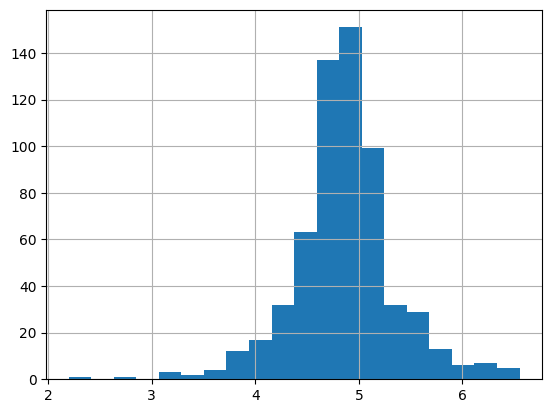

In [11]:
data['LoanAmount_log'] = np.log(data['LoanAmount'])
data['LoanAmount_log'].hist(bins=20)

We can see that the distribution looks closer to normal and the extreme values have been reduced.

In [12]:
## dealing with outliers in test dataset
test['LoanAmount_log']=np.log(test['LoanAmount'])

In [13]:
data.to_csv('./data/prepped_data.csv', index=False)
test.to_csv('./data/prepped_test.csv', index=False)